<a href="https://colab.research.google.com/github/Raredorsa/Dorsa-s-Pub/blob/main/VQC_%26_QSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dorsa Mehditabar

In [ ]:
pip install qiskit qiskit_machine_learning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512548 sha256=5c9343560fa1c699c7d5f9be27226a538a8af07d31b20ee72fe62c8506a14e61
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d5

In [ ]:
pip install qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import qiskit
from qiskit_aer.aerprovider import AerSimulator
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.utils import algorithm_globals
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


In [ ]:
algorithm_globals.random_seed = 42


In [ ]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement='linear')

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)


<ipython-input-6-752d55077cbf>:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [ ]:
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train[:, :4], y_train)


QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7e095c48a1a0>,
     random_state=42, shrinking=True, tol=0.001, verbose=False)

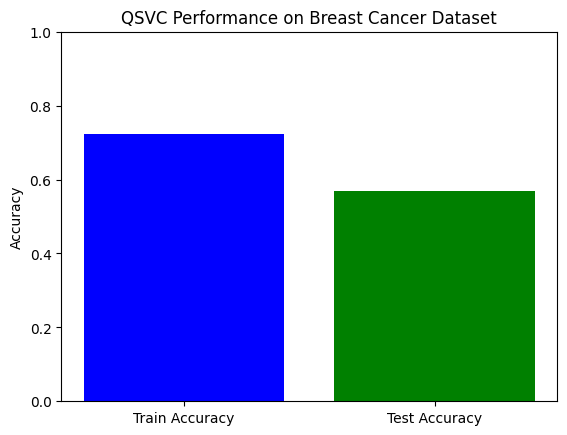

In [ ]:
y_pred_train = qsvc.predict(X_train[:, :4])
y_pred_test = qsvc.predict(X_test[:, :4])

train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

fig, ax = plt.subplots()
x_vals = ['Train Accuracy', 'Test Accuracy']
y_vals = [train_accuracy, test_accuracy]
ax.bar(x_vals, y_vals, color=['blue', 'green'])
ax.set_ylim([0, 1])
ax.set_title('QSVC Performance on Breast Cancer Dataset')
ax.set_ylabel('Accuracy')

plt.show()


In [ ]:
pip install qiskit-algorithms


In [ ]:
pip install qiskit-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.4/643.4 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 15.8 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.28.240-py3-none-any.whl size=682834 sha256=2a2498ca30041d6c59ae4a497ec88e35d2a19fac7cb21e67b44d35dcd406664a
  Stored in directory: /root/.cache/pip/wheels/1b/ec/59/cc07dedc67b032a492201f6f26c1f3c9e667ef208c9213ba6d
Successfully built docplex


In [ ]:
pip install qiskit-aer


In [ ]:
pip install qiskit --upgrade


In [ ]:
import qiskit
print(qiskit.__version__)


1.2.2


In [ ]:
import numpy as np
import qiskit
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

algorithm_globals.random_seed = 42

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_q = X_train[:, :4]
X_test_q = X_test[:, :4]

feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement='linear')

var_circuit = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz', reps=3)

quantum_circuit = feature_map.compose(var_circuit)
quantum_circuit.measure_all()

params = np.random.rand(var_circuit.num_parameters + feature_map.num_parameters)

simulator = AerSimulator()

sampler = Sampler()

bound_circuit = quantum_circuit.assign_parameters(params)

predictions = []
for x in X_test_q:
    bound_circuit = quantum_circuit.assign_parameters(params)

    result = sampler.run(bound_circuit, shots=1024).result()

    quasi_dists = result.quasi_dists[0]

    prob_0 = quasi_dists.get(0, 0) + quasi_dists.get(1, 0)
    prob_1 = quasi_dists.get(2, 0) + quasi_dists.get(3, 0)
    prediction = 1 if prob_1 > prob_0 else 0
    predictions.append(prediction)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


<ipython-input-23-62cc0406132b>:51: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Accuracy: 0.62
